In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/Users/venka/OneDrive/Desktop/Data science course/ML/NewspaperData.csv")

In [3]:
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [5]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [7]:
df.corr(numeric_only=True) 

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


C:\Users\venka\AppData\Local\Temp\ipykernel_5268\2796133955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])


<Axes: xlabel='daily', ylabel='Density'>

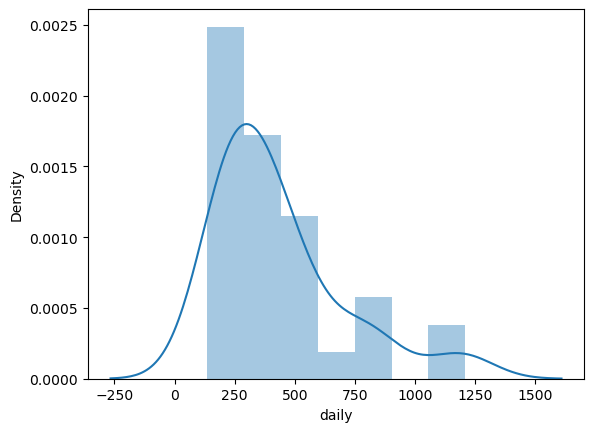

In [9]:
import seaborn as sns
sns.distplot(df['daily']) 

C:\Users\venka\AppData\Local\Temp\ipykernel_5268\1036117173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

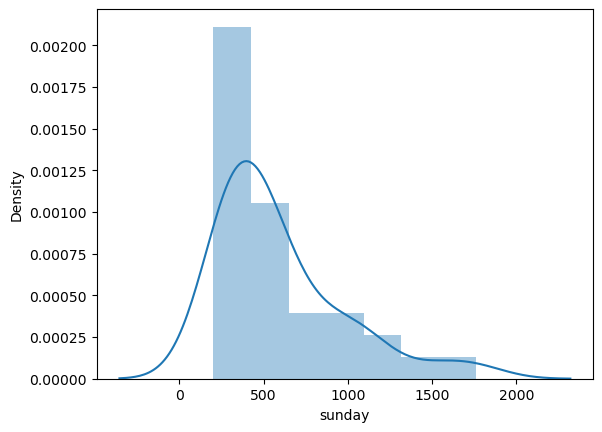

In [11]:
sns.distplot(df['sunday'])

# Fitting a Linear Regression Model

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = df).fit() #syntax(smf.ols("target~actual, data=ourdataframe").fit())

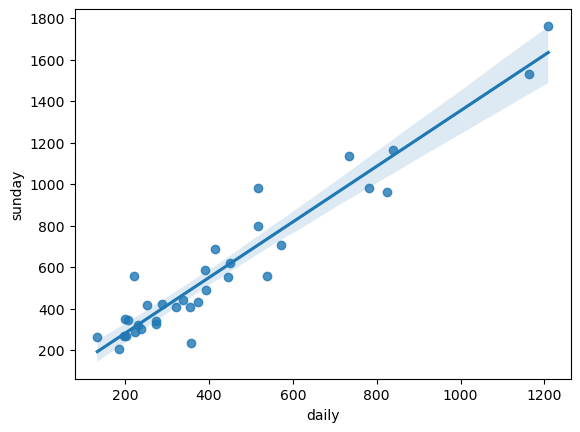

In [14]:
sns.regplot(x="daily", y="sunday", data=df);

In [15]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [16]:
#1100(manual calculation)
(1.3*1100)+13.835630 #mx+c m=slope c=constant

1443.83563

In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# # Predict for new data point

In [20]:
#Predict for 200 and 300 daily circulation
new=pd.Series([200,300])

In [21]:
new

0    200
1    300
dtype: int64

In [18]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [22]:
data_pred

,daily
0,200
1,300


In [19]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64